## Importing Libraries

In [710]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [711]:
import seaborn as sns

In [712]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Dataset

In [713]:
dataframe = pd.read_csv('Telco_customer_churn.csv')
df = dataframe.copy()

In [714]:
dataframe.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [716]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Cleaning Data

### Changing type of total charges column to float

In [717]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [718]:
df.drop('churn_reason', inplace=True, axis=1)

In [719]:
df["monthly_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: monthly_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [720]:
df["total_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


- Function checking if string represents a numeric value

In [721]:
def represents_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [722]:
def print_non_numeric_strings(series):
    non_numeric_strings = series[~series.apply(represents_numeric)]
    for item in non_numeric_strings:
        print(item + 'non-numeric')

In [723]:
print_non_numeric_strings(df['total_charges'])

 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric
 non-numeric


In [724]:
df['total_charges'] = df['total_charges'].apply(lambda x: 0 if x == " " else x )

In [725]:
df['total_charges'] = df['total_charges'].astype('float64')

In [726]:
df["total_charges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


### Removing Uneffective columns

In [727]:
print(
    df['state'].unique(), "\n",
    df['count'].unique(), '\n',
    df['country'].unique()
)

['California'] 
 [1] 
 ['United States']


In [728]:
columnsToDrop = ['count', 'country', 'state', "zip_code"]
df.drop(columns= columnsToDrop, inplace=True, axis=1)

In [729]:
df.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv
0,3668-QPYBK,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


## Data Preprocessing

In [730]:
df.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv
0,3668-QPYBK,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


### Checking Outliers, and Skewness for the Numeric Values

#### Total Charges

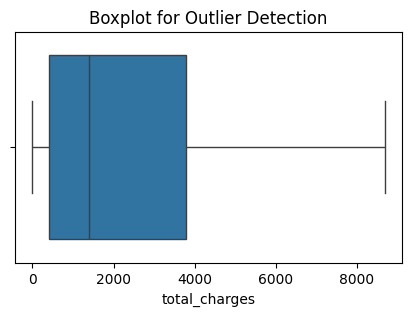

In [731]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['total_charges'])

# Show the plot
plt.xlabel('total_charges')
plt.title('Boxplot for Outlier Detection')
plt.show()

- No outliers detected

<function matplotlib.pyplot.show(close=None, block=None)>

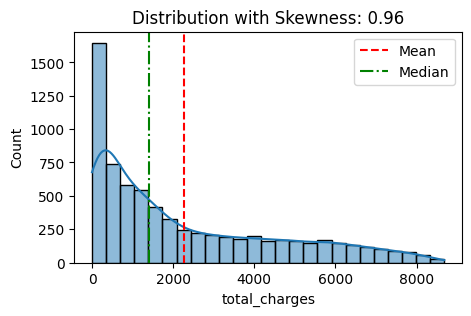

In [732]:
skewness = df['total_charges'].skew()

# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df['total_charges'], kde=True)
plt.axvline(df['total_charges'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['total_charges'].median(), color='g', linestyle='-.', label='Median')
plt.title(f'Distribution with Skewness: {skewness:.2f}')
plt.legend()
plt.show

- Right skewness detected in total_charges column

In [733]:
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PowerTransformer

# Square root transformation
df['total_charges_SquareRoot_Transformed'] = np.sqrt(df['total_charges'])

# Cube root transformation
df['total_charges_CubeRoot_Transformed'] = df['total_charges']**(1/3)

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
yeo_johnson_values = pt.fit_transform(df[['total_charges']])
df['total_charges_YeoJohnson_Transformed'] = yeo_johnson_values

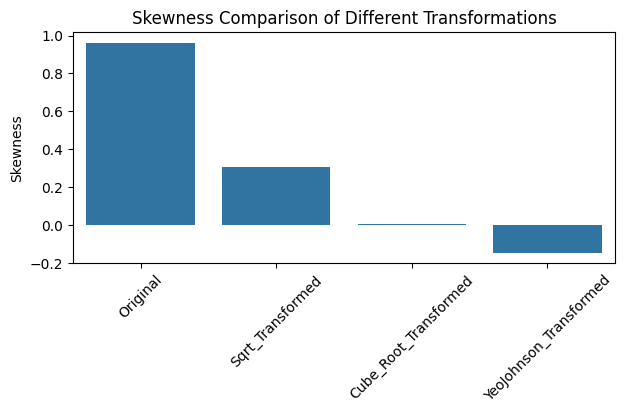

In [734]:
# Calculate skewness for each transformed column
skewness_data = {
    'Original': df['total_charges'].skew(),
    'Sqrt_Transformed': df['total_charges_SquareRoot_Transformed'].skew(),
    'Cube_Root_Transformed': df['total_charges_CubeRoot_Transformed'].skew(),
    'YeoJohnson_Transformed': pd.Series(yeo_johnson_values.flatten()).skew()
}

# Generate a bar plot for skewness comparison
plt.figure(figsize=(7, 3))
sns.barplot(x=list(skewness_data.keys()), y=list(skewness_data.values()))
plt.title('Skewness Comparison of Different Transformations')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

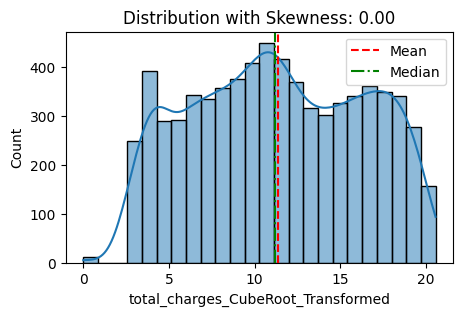

In [735]:
skewness = df['total_charges_CubeRoot_Transformed'].skew()

# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df['total_charges_CubeRoot_Transformed'], kde=True)
plt.axvline(df['total_charges_CubeRoot_Transformed'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['total_charges_CubeRoot_Transformed'].median(), color='g', linestyle='-.', label='Median')
plt.title(f'Distribution with Skewness: {skewness:.2f}')
plt.legend()
plt.show

In [736]:
droping = ['total_charges_SquareRoot_Transformed',
                    'total_charges_YeoJohnson_Transformed']

df.drop(columns=droping, axis= 1, inplace=True)

In [737]:
df.drop('total_charges', axis=1, inplace=True)

#### Monthly Charges

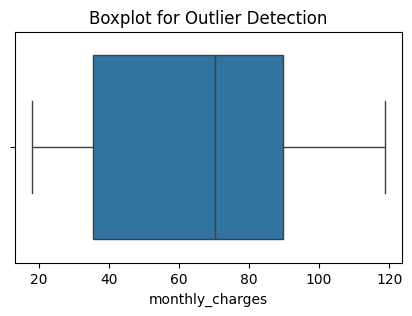

In [738]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['monthly_charges'])

# Show the plot
plt.xlabel('monthly_charges')
plt.title('Boxplot for Outlier Detection')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

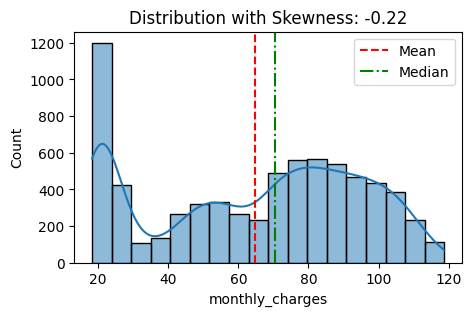

In [739]:
skewness = df['monthly_charges'].skew()

# Plotting
plt.figure(figsize=(5, 3))
sns.histplot(df['monthly_charges'], kde=True)
plt.axvline(df['monthly_charges'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['monthly_charges'].median(), color='g', linestyle='-.', label='Median')
plt.title(f'Distribution with Skewness: {skewness:.2f}')
plt.legend()
plt.show

- left skewness detected

### Data Transformation for Logistic Regression Model

In [740]:
target_column = 'churn_value'
target_index = df.columns.get_loc(target_column)

# Remove the target column from its current position
target_data = df.pop(target_column)

# Insert the target column at the last position
df.insert(len(df.columns), target_column, target_data)

encoding the city

In [741]:
# df_encoded = pd.get_dummies(df["city"], prefix= 'city', drop_first=False)
# df_encoded = df_encoded.astype(int)
# df[df_encoded.columns] = df_encoded

In [742]:
# df.drop('city', axis=1, inplace=True)

#### Splitting The Data

In [743]:
from sklearn.model_selection import train_test_split

features_start_index = 0  
target_index = -1  


X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.drop('churn_label', axis=1, inplace = True)

In [744]:
X_test.drop('churn_label', axis=1, inplace = True)

In [745]:
X_train.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,total_charges_CubeRoot_Transformed
2142,9571-EDEBV,San Diego,"32.802959, -117.027095",32.802959,-117.027095,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,28,5101,19.095411
1623,7562-GSUHK,Jamestown,"37.84771, -120.486589",37.847710,-120.486589,Female,No,No,No,16,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.20,75,5497,11.631632
6074,2325-WINES,Littlerock,"34.505273, -117.955054",34.505273,-117.955054,Female,No,No,No,32,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.05,60,2335,15.061745
1362,9381-NDKME,El Monte,"34.079934, -118.046695",34.079934,-118.046695,Female,Yes,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,85,3843,9.772532
6754,2164-SOQXL,Los Angeles,"33.988543, -118.334081",33.988543,-118.334081,Female,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,43,2698,7.405025


In [746]:
X_test.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,total_charges_CubeRoot_Transformed
185,2189-WWOEW,Keene,"35.214982, -118.59049",35.214982,-118.590490,Female,No,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.9,96,3579,10.828042
2715,2446-ZKVAF,Stockton,"38.002125, -121.324979",38.002125,-121.324979,Male,No,Yes,No,18,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),56.8,59,5558,10.242886
3825,4986-MXSFP,San Leandro,"37.687264, -122.15728",37.687264,-122.157280,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.0,39,2237,3.445412
1807,5868-YWPDW,Sherman Oaks,"34.146957, -118.432138",34.146957,-118.432138,Male,Yes,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.2,72,5834,8.037068
132,9412-GHEEC,Murrieta,"33.581045, -117.14719",33.581045,-117.147190,Male,No,No,No,40,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),104.8,88,3492,16.046674


#### Senoir_citizen

In [747]:
X_train['senior_citizen'].unique()


array(['No', 'Yes'], dtype=object)

In [748]:
X_train['senior_citizen'] = X_train['senior_citizen'].map({'Yes': 1, "No": 0})

In [749]:
X_test['senior_citizen'] = X_test['senior_citizen'].map({'Yes': 1, "No": 0})

#### Gender

In [750]:
X_train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [751]:
X_train['gender'] = X_train['gender'].map({"Male": 1, "Female": 0})

In [752]:
X_test['gender'] = X_test['gender'].map({"Male": 1, "Female": 0})

#### Partner

In [753]:
X_train['partner'].unique()

array(['Yes', 'No'], dtype=object)

In [754]:
X_train['partner'] = X_train['partner'].map({'Yes': 1, 'No': 0})

In [755]:
X_test['partner'] = X_test['partner'].map({'Yes': 1, 'No': 0})

#### Dependents

In [756]:
X_train['dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [757]:
X_train['dependents'] = X_train['dependents'].map({'Yes': 1, "No": 0})

In [758]:
X_test['dependents'] = X_test['dependents'].map({'Yes': 1, "No": 0})

#### Phone Service

In [759]:
X_train['phone_service'].unique()

array(['Yes', 'No'], dtype=object)

In [760]:
X_train['phone_service'] = X_train['phone_service'].map({'Yes': 1, "No": 0})

In [761]:
X_test['phone_service'] = X_test['phone_service'].map({'Yes': 1, "No": 0})

#### Paperless Billing

In [762]:
X_train['paperless_billing'].unique()

array(['Yes', 'No'], dtype=object)

In [763]:
X_train['paperless_billing'] = X_train['paperless_billing'].map({'Yes': 1, "No": 0})

In [764]:
X_test['paperless_billing'] = X_test['paperless_billing'].map({'Yes': 1, "No": 0})

#### Payment Method

In [765]:
X_train['payment_method'].unique()

array(['Credit card (automatic)', 'Mailed check', 'Electronic check',
       'Bank transfer (automatic)'], dtype=object)

#### Display datasets

In [766]:
X_train.drop('customerid', axis=1, inplace=True)

In [767]:
X_test.drop('customerid', axis=1, inplace=True)

In [768]:
X_train.drop('lat_long', axis=1, inplace=True)
X_test.drop('lat_long', axis=1, inplace=True)

### Logistic Regression Model

In [769]:
df.head()

,customerid,city,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_label,churn_score,cltv,total_charges_CubeRoot_Transformed,churn_value
0,3668-QPYBK,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,86,3239,4.764407,1
1,9237-HQITU,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,67,2701,5.332704,1
2,9305-CDSKC,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,86,5372,9.361804,1
3,7892-POOKP,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,84,5003,14.495916,1
4,0280-XJGEX,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,89,5340,17.141041,1


#### Calculating the Weight of Evidance

In [770]:
woe_maps = {}
def calculate_woe(df, features, target):
    for feature in features:
        # Calculate the count of each category for both positive and negative cases
        df_counts = df.groupby([feature, target]).size().unstack().fillna(0)
        # Calculate the proportion of positive cases and total cases for each category
        df_counts['total'] = df_counts.sum(axis=1)
        df_counts['positive_rate'] = df_counts[1] / df_counts['total']
        df_counts['total_rate'] = df_counts['total'] / df_counts['total'].sum()
        # Apply a small adjustment to avoid division by zero and infinity
        df_counts['positive_rate'] = df_counts['positive_rate'].replace(0, 0.001)
        df_counts['positive_rate'] = df_counts['positive_rate'].replace(1, 0.999)
        # Calculate WoE for each category
        df_counts['woe'] = np.log(df_counts['positive_rate'] / (1 - df_counts['positive_rate']))
        # Create a dictionary to map categories to their corresponding WoE values
        woe_map = df_counts['woe'].to_dict()
        woe_maps[feature] = woe_map
        # Replace categories in the DataFrame with their WoE values
        df[feature] = df[feature].map(woe_map)
    return df

In [771]:
X_train.head()

,city,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,total_charges_CubeRoot_Transformed
2142,San Diego,32.802959,-117.027095,1,0,1,0,71,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,1,Credit card (automatic),98.65,28,5101,19.095411
1623,Jamestown,37.847710,-120.486589,0,0,0,0,16,1,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,1,Credit card (automatic),93.20,75,5497,11.631632
6074,Littlerock,34.505273,-117.955054,0,0,0,0,32,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),104.05,60,2335,15.061745
1362,El Monte,34.079934,-118.046695,0,1,1,0,24,0,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,1,Credit card (automatic),40.65,85,3843,9.772532
6754,Los Angeles,33.988543,-118.334081,0,0,1,1,20,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.05,43,2698,7.405025


In [772]:
col = ['city','latitude','longitude','gender','senior_citizen','partner','dependents','tenure_months','phone_service','multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','contract','paperless_billing','payment_method','monthly_charges','churn_score','cltv','total_charges_CubeRoot_Transformed']

In [773]:
X_train_woe = X_train.copy()

In [774]:
X_train_woe = calculate_woe(X_train, col, y_train)

In [775]:
X_train.head()

,city,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,total_charges_CubeRoot_Transformed
2142,San Diego,32.802959,-117.027095,1,0,1,0,71,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,1,Credit card (automatic),98.65,28,5101,19.095411
1623,Jamestown,37.847710,-120.486589,0,0,0,0,16,1,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,1,Credit card (automatic),93.20,75,5497,11.631632
6074,Littlerock,34.505273,-117.955054,0,0,0,0,32,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),104.05,60,2335,15.061745
1362,El Monte,34.079934,-118.046695,0,1,1,0,24,0,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,1,Credit card (automatic),40.65,85,3843,9.772532
6754,Los Angeles,33.988543,-118.334081,0,0,1,1,20,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.05,43,2698,7.405025


In [782]:
X_test_woe = X_test.copy()

In [ ]:
X_test_woe = calculate_woe(X_test, col, y_test)

In [777]:
X_test.head()

,city,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,total_charges_CubeRoot_Transformed
185,Keene,35.214982,-118.590490,0,0,0,0,15,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,1,Bank transfer (automatic),85.9,96,3579,10.828042
2715,Stockton,38.002125,-121.324979,1,0,1,0,18,1,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,0,Credit card (automatic),56.8,59,5558,10.242886
3825,San Leandro,37.687264,-122.157280,0,0,0,0,2,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,20.0,39,2237,3.445412
1807,Sherman Oaks,34.146957,-118.432138,1,1,1,0,6,1,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,1,Electronic check,84.2,72,5834,8.037068
132,Murrieta,33.581045,-117.147190,1,0,0,0,40,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,0,Bank transfer (automatic),104.8,88,3492,16.046674


#### Building the Model

In [778]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression

##### No parameter Tuning

In [779]:
logreg = LogisticRegression()

In [780]:
logreg.fit(X_train, y_train)

ValueError: could not convert string to float: 'San Diego'

In [ ]:
yPred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, yPred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, yPred))

print("\nConfusion Matrix:")

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:


In [ ]:
confusion_matrix(y_test, yPred)

array([[1009,    0],
       [   0,  400]], dtype=int64)

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, yPred)
print("Accuracy:", accuracy)

Accuracy: 1.0


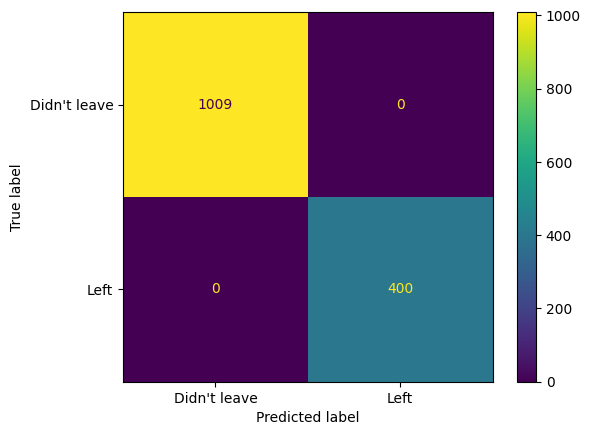

In [ ]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

##### With Parameter Tuning

In [ ]:
logreg = LogisticRegression()

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],      # Regularization parameter
    'solver': ['liblinear', 'saga'] # Solver to use in the optimization
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\P

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']})

In [ ]:
# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
[[1009    0]
 [   0  400]]


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1009,    0],
       [   0,  400]], dtype=int64)

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



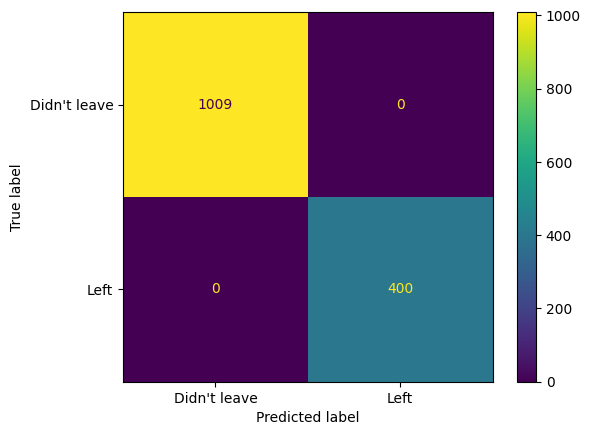

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

In [ ]:
precision_score(y_test, grid_search.predict(X_test))

1.0

### Decision Tree Model

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
param_grid = {
    'max_depth': [8, 12, 16, None],  # None means unlimited depth
    'min_samples_split': [6, 12, 28],
    'min_samples_leaf': [4, 8, 16]
}

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, None],
                         'min_samples_leaf': [4, 8, 16],
                         'min_samples_split': [6, 12, 28]})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

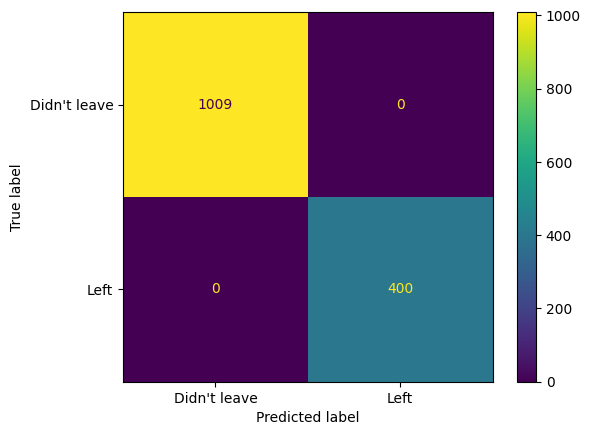

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search_clf, X_test, y_test, values_format = 'd', display_labels = ["Didn't leave", 'Left']);

In [ ]:
accuracy_score(y_test, y_pred)

0.9992902767920511

In [ ]:
precision_score(y_test, clf.predict(X_test))

1.0

In [ ]:
recall_score(y_test, grid_search_clf.predict(X_test))

1.0

### Random Forests 